In [3]:
import numpy as np
import scipy as sp
from scipy import linalg as lg
from scipy import integrate
from scipy.integrate import odeint
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
get_ipython().magic(u'matplotlib inline')

In [4]:
#Lanchester’s Combat models

In [5]:
#1.

In [6]:
#Condiciones iniciales y tiempo de integracion
t = np.linspace(0,100,1000)
y = [23000.0,100000.0]

b = [ 0.00911707  0.00994344  0.00044089  0.002345    0.00339884]
n = [ 0.82815458  0.94041403  0.67162391  0.27712531  0.03139764]
e = [ 1.65630917  1.88082806  1.34324782  0.55425062  0.06279528]
a = [ 0.41407729  0.47020702  0.33581196  0.13856265  0.01569882]


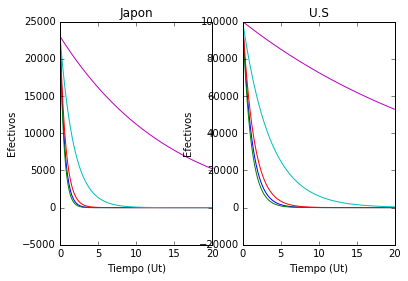

In [56]:
#Ecuacion diferencial asumiendo que Japon pierde con x = 1
#Los valores de n y b se consideran aleatorios

#Ecuacion
def L(ys,ts,b,n):
    
    #Coeficientes
    a = 0.5*b
    e = 2*n
    
    #Ecuaciones
    dldt = np.zeros(len(ys))
    dldt[0] = -a*ys[1] - e*ys[0]
    dldt[1] = -b*ys[0] - n*ys[1]
    
    return dldt

#Almacenamiento de los b y n
bs = []
ns = []

#Calculo de los b y n
for i in xrange(0,5):
    
    #Generacion aleatoria de los b y n
    random.seed()
    b = 0.01*random.random()
    n = random.random()
    
    #Solucion a la ecuacion diferencial con Odeint
    Sol = integrate.odeint(L,y,t,args=(b,n))
    
    #Condicion para que b y n permitan ganar en un rango de 2 a 20 Ut
    if (Sol[:,1][i])<76700.0 or Sol[:,0][i]<0.0 :break
    else:
        bs.append(b)
        ns.append(n)  
        
        ext=20
        #Grafico de la solucion
        plt.subplot(1,2,1)
        plt.plot(t,Sol[:,0])
        plt.title('Japon')
        plt.xlabel('Tiempo (Ut)')
        plt.ylabel('Efectivos')
        plt.xlim(0,ext)
    
        plt.subplot(1,2,2)
        plt.plot(t,Sol[:,1])
        plt.title('U.S')
        plt.xlabel('Tiempo (Ut)')
        plt.ylabel('Efectivos')
        plt.xlim(0,ext)
               
bs = np.array(bs)
ns = np.array(ns)

print 'b =',bs
print 'n =',ns
print 'e =',2*ns
print 'a =',0.5*ns

In [57]:
"""
En el grafico se muesta el comportamiento de la armada estadounidense
para diferentes valores de b y n cuando se supone que estos ganan 
(se supone que la armada japonesa pierde cuando queda sin efectivos)
Los valores de b y n se dan de manera aleatoria y para aquellos que hagan 
el numero de efectivos mayor a 76700 efectivos se clasifican para dar una
victoria entre 2 y 20 unidades de tiempo.
"""

'\nEn el grafico se muesta el comportamiento de la armada estadounidense\npara diferentes valores de b y n cuando se supone que estos ganan \n(se supone que la armada japonesa pierde cuando queda sin efectivos)\nLos valores de b y n se dan de manera aleatoria y para aquellos que hagan \nel numero de efectivos mayor a 76700 efectivos se clasifican para dar una\nvictoria entre 2 y 20 unidades de tiempo.\n'

In [58]:
#2.

In [59]:
#RK4
def RK4(f,y0,ts):
    
    #f es el conjunto de funciones acopladas y con argumentos de la forma f(y,t)
    #donde y0 es una lista de condiciones iniciales

    #Datos
    h = abs(ts[1]-ts[0])
    N = int(len(ts)/h)
    print 'Numero de iteraciones:', N
    
    t0 = ts[0]
    y0 = np.array(y0)
    
    Sol = []
    
    for i in xrange(0,N):
        #Ks:
        k0 = f( y0,t0)
        k1 = f( y0 + 0.5*k0*h,t0 + 0.5*h)
        k2 = f( y0 + 0.5*k1*h,t0 + 0.5*h)
        k3 = f( y0 + k2*h,t0 + h)
        
        #Solucion
        y1 = y0 + h*(k0 + 2*k1 + 2*k2 + k3)/6.0
        Sol.append(y1)
        
        y0 = y1
        t0 = t0 + i*h

    return Sol

In [60]:
#3.

In [61]:
#Funciones a solucionar

#Coeficientes
b = bs[0]
a = 0.5*b
c = 0.5*b
n = ns[0]
e = 2*n

#L, es la misma del punto 1
def L(ys,ts):
    
    #Coeficientes
    a = 0.5*b
    e = 2*n
    
    #Ecuaciones
    dldt = np.zeros(len(ys))
    dldt[0] = -a*ys[1] - e*ys[0]
    dldt[1] = -b*ys[0] - n*ys[1]
    
    return dldt
Sol = RK4(L,y,t)

Numero de iteraciones: 9990


In [62]:
#4.

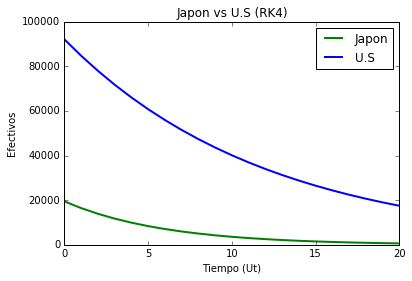

In [65]:
#Grafico

#Seleccionando los elementos para el grafico
J = []
U = []

for i in xrange(len(Sol)):
    if Sol[i][0]>0.0 or Sol[i][1]>76700.:
        J.append(Sol[i][0])
        U.append(Sol[i][1])

#Graficando
ext = 20
plt.plot(J,color="green", linewidth=2, label="Japon")
plt.plot(U,color="blue", linewidth=2, label="U.S")
plt.title('Japon vs U.S (RK4)')
plt.xlabel('Tiempo (Ut)')
plt.ylabel('Efectivos')
plt.xlim(0,ext)
plt.legend()

In [66]:
#5.

In [67]:
#Funcion para el caso de una infiltracion de los japoneses.

#El parametro c se considera igual al a.
c=a

def L2(ys,ts):
    
    #Ecuaciones
    dldt = np.zeros(len(ys))
    dldt[0] = -c*ys[0]*ys[1] - e*ys[0]
    dldt[1] = -b*ys[0] - n*ys[1]
    
    return dldt

t2 = np.linspace(0,3,1000)
Sol2 = RK4(L2,y,t2)
print len(t2)

Numero de iteraciones: 333000
1000


In [68]:
#6.

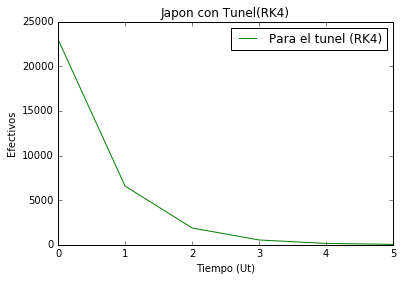

In [69]:
#Grafico con RK4

J2 = [23000.]
U2 = []

for i in xrange(0,len(Sol2)):
    J2.append(Sol2[i][0])
    U2.append(Sol2[i][1])

plt.plot(J2,color='green',label="Para el tunel (RK4)")
plt.title('Japon con Tunel(RK4)')
plt.xlabel('Tiempo (Ut)')
plt.ylabel('Efectivos')
plt.xlim(0,5)
plt.ylim(0,25000)
plt.legend()

In [70]:
#7.

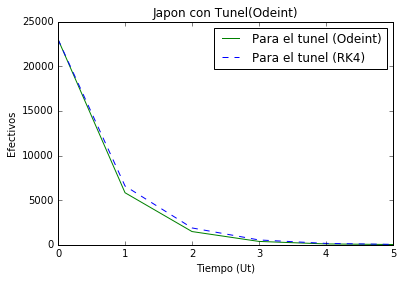

In [71]:
#Solucion con Odeint

#Solucion
Sol21 = integrate.odeint(L2,y,t2)

#Grafico
plt.plot(Sol21[:,0],color='green',label="Para el tunel (Odeint)")
plt.plot(J2,'--',label="Para el tunel (RK4)")
plt.title('Japon con Tunel(Odeint)')
plt.xlabel('Tiempo (Ut)')
plt.ylabel('Efectivos')
plt.xlim(0,5)
plt.ylim(0,25000)
plt.legend()

In [72]:
#Conclusiones.

In [73]:
"""
En todos los casos la armada japonesa pierde (figuras punto 1 y 4), podrian estar cerca de la victoria
en algunos casos como se muestra en los graficos del punto 1 pero siempre el resultado
es que pierden.
Cuando los japoeses realizan el tunel en lugar de aumentar las probabilidades de ganar
estas disminuyen llevandolos mas rapidamente a una derrota inminente debido en especial al 
grosor de la armada estadounidense.
Los comportamientos de RK4 (programado) y de la Odeint son ambos muy similares como se puede 
observar en la figura del punto 7 donde no se aprecia diferencia
significativa entre ambos metodos.
"""

'\nEn todos los casos la armada japonesa pierde (figuras punto 1 y 4), podrian estar cerca de la victoria\nen algunos casos como se muestra en los graficos del punto 1 pero siempre el resultado\nes que pierden.\nCuando los japoeses realizan el tunel en lugar de aumentar las probabilidades de ganar\nestas disminuyen llevandolos mas rapidamente a una derrota inminente debido en especial al \ngrosor de la armada estadounidense.\nLos comportamientos de RK4 (programado) y de la Odeint son ambos muy similares como se puede \nobservar en la figura del punto 7 donde no se aprecia diferencia\nsignificativa entre ambos metodos.\n'

In [74]:
#Radioactive decay

In [75]:
#Calculo de decaimiento
def Dec(N):

    Ns = [N]

    while N>0.0:
    
        for j in xrange(0,int(N)):
            np.random.seed()
            if np.random.random()>0.3:
                N = N - 1.
        Ns.append(N)

    return Ns

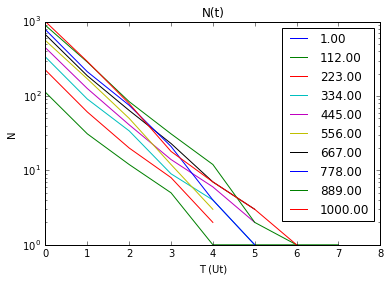

In [76]:
#Graficas

#N para graficar
Ns = np.linspace(1.,1000.,10)

for i in xrange(0,len(Ns)):
    k = Ns[i]*1.0
    D = Dec(Ns[i])
    plt.semilogy()
    plt.plot(D,label='%.2f' % k)
    plt.title('N(t)')
    plt.xlabel('T (Ut)')
    plt.ylabel('N')
    plt.ylim(0,Ns[-1])
    plt.legend()
    

In [77]:
#Conclusiones

In [78]:
"""
Del grafico se puede concluir que al aumentar el numero de particulas el 
decaimiento adquiere un patron en este caso temporal tendiendo a 
linealizarse (en un grafico logaritmico), luego al disminuir el numero
de particulas el decaimiento se vera mas aleatorio que con un mayor numero de
estas.
"""

'\nDel grafico se puede concluir que al aumentar el numero de particulas el \ndecaimiento adquiere un patron en este caso temporal tendiendo a \nlinealizarse (en un grafico logaritmico), luego al disminuir el numero\nde particulas el decaimiento se vera mas aleatorio que con un mayor numero de\nestas.\n'